# SEDA DATA


### https://edopportunity.org/get-the-data/seda-archive-downloads/

In [1]:
# Calling all the packages in python
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view

### 1.Retrieving Data from SEDA

In [17]:
# Path
SEDA = pd.read_csv("https://stacks.stanford.edu/file/druid:db586ns4974/seda_cov_school_poolyr_4.0.csv")

In [29]:
# First 10 observations 
SEDA.head(10)

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perrl,perfrl,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall
0,10000500870,2009,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.066071,0.546429,0.547237,"Town, Fringe",NaN,NaN,NaN,NaN,NaN,280.0
1,10000500870,2010,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.073864,0.606061,0.588803,"Town, Distant",NaN,NaN,NaN,NaN,NaN,263.0
2,10000500870,2011,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.049296,0.647887,0.643357,"Town, Distant",NaN,NaN,NaN,NaN,NaN,284.0
3,10000500870,2012,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.082237,0.644737,0.641322,"Town, Distant",0.099836,0.088380,0.081833,0.0,0.0,303.5
4,10000500870,2013,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.057096,0.601958,0.633058,"Town, Distant",NaN,NaN,NaN,NaN,NaN,306.5
5,10000500870,2014,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.064873,0.707278,0.691943,"Town, Distant",0.162205,0.170079,0.163780,0.0,0.0,316.0
6,10000500870,2015,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.068853,0.482443,0.468657,"Town, Distant",NaN,NaN,NaN,NaN,NaN,338.5
7,10000500870,2016,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.073133,0.470861,0.430416,"Town, Distant",0.078125,0.072443,0.062500,0.0,0.0,352.0
8,10000500870,2017,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.129158,0.513368,1.000000,"Town, Distant",NaN,NaN,NaN,NaN,NaN,380.0
9,10000500870,2018,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.064436,0.706320,0.386534,"Town, Distant",0.091698,0.065675,0.060719,0.0,0.0,403.5


In [19]:
# Checking the type of dataframe
type(SEDA)

pandas.core.frame.DataFrame

In [25]:
SEDA.shape

(746823, 31)

## 2. Key Observations  
### Total Number of observations in SEDA
SEDA data has 746823 entries.
### Variables
Contains a total of 31 variables.
### Time period covered by SEDA
Years = (2009 to 2018)


In [26]:
# List of all the 31 items in the columns
SEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746823 entries, 0 to 746822
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sedasch         746823 non-null  int64  
 1   year            746823 non-null  int64  
 2   schnam          746823 non-null  object 
 3   schcity         746810 non-null  object 
 4   sedalea         746823 non-null  int64  
 5   fips            746823 non-null  int64  
 6   stateabb        746823 non-null  object 
 7   type            746810 non-null  object 
 8   level           746609 non-null  object 
 9   mingrd          740278 non-null  float64
 10  maxgrd          740278 non-null  float64
 11  charter         746810 non-null  float64
 12  magnet          746810 non-null  float64
 13  urbanicity      746483 non-null  object 
 14  totenrl         746823 non-null  float64
 15  perwht          746823 non-null  float64
 16  perind          746823 non-null  float64
 17  perasn    

## 3. Data Preparation 

### 3.1 Cross-Sectional Data
Conversion to Cross-sectional for year = 2018 

In [35]:
SEDA_2018 = SEDA[SEDA.year == 2018]
SEDA_2018.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perrl,perfrl,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall
9,10000500870,2018,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.064436,0.706320,0.386534,"Town, Distant",0.091698,0.065675,0.060719,0.000000,0.0,403.50
19,10000500879,2018,Evans Elementary School,Albertville,100005,1,AL,Regular School,Middle,5.0,...,0.042353,0.715294,0.431765,"Town, Distant",0.121780,0.121780,0.110070,0.100703,0.0,425.00
29,10000500889,2018,Albertville Elementary School,Albertville,100005,1,AL,Regular School,Elementary,3.0,...,0.045254,0.754967,0.451720,"Town, Distant",0.334437,0.086093,0.086093,0.088300,0.0,453.00
39,10000600193,2018,Kate Duncan Smith DAR Middle,Grant,100006,1,AL,Regular School,Middle,5.0,...,0.087760,0.554273,0.569124,"Rural, Distant",0.007177,0.153110,0.136364,0.071770,0.0,108.25
49,10000600872,2018,Asbury High School,Albertville,100006,1,AL,Regular School,High,3.0,...,0.081784,0.836431,0.898113,"Rural, Distant",0.069470,0.160878,0.157221,0.000000,0.0,88.00


In [36]:
SEDA_2018.shape

(73345, 31)

**Note: The total number of observations goes down 73345 and contains only observations for the year 2018.**


### 3.2 GeoDataFrame
Conversion to Geodataframe

In [40]:
# Since SEDA has no geometry hence we need a index to convert the data into geodataframe
df_sedasch =SEDA_2018[['sedasch', 'schnam', 'year']] # trying to determine the index.

In [41]:
df_sedasch.head()

,sedasch,schnam,year
9,10000500870,Albertville Middle School,2018
19,10000500879,Evans Elementary School,2018
29,10000500889,Albertville Elementary School,2018
39,10000600193,Kate Duncan Smith DAR Middle,2018
49,10000600872,Asbury High School,2018


### Schools data from NCES

In [42]:

schools = gpd.read_parquet("s3://spatial-ucr/nces/schools/schools_1819.parquet")


In [43]:
schools.head()

,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,0100005,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20617 34.26019)
1,010000500871,0100005,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20488 34.26223)
2,010000500879,0100005,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22014 34.27332)
3,010000500889,0100005,Albertville Elementary School,01,145 West End Drive,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22181 34.25270)
4,010000501616,0100005,Big Spring Lake Kindergarten School,01,257 Country Club Rd,Albertville,AL,35951,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.19329 34.28985)


In [44]:
schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 102176 entries, 0 to 102175
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   NCESSCH     102176 non-null  object  
 1   LEAID       102176 non-null  object  
 2   NAME        102176 non-null  object  
 3   OPSTFIPS    102176 non-null  object  
 4   STREET      102176 non-null  object  
 5   CITY        102176 non-null  object  
 6   STATE       102176 non-null  object  
 7   ZIP         102176 non-null  object  
 8   STFIP       102176 non-null  object  
 9   CNTY        102176 non-null  object  
 10  NMCNTY      102176 non-null  object  
 11  LOCALE      102176 non-null  object  
 12  LAT         102176 non-null  float64 
 13  LON         102176 non-null  float64 
 14  CBSA        102176 non-null  object  
 15  NMCBSA      102176 non-null  object  
 16  CBSATYPE    102176 non-null  object  
 17  CSA         102176 non-null  object  
 18  NMCSA       1021

<AxesSubplot:>

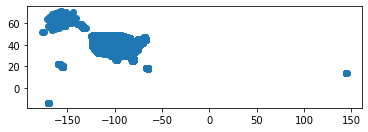

In [53]:
schools.plot()

In [47]:
sch_geoms = schools[['NCESSCH','geometry']]

In [48]:
sch_geoms

,NCESSCH,geometry
0,010000500870,POINT (-86.20617 34.26019)
1,010000500871,POINT (-86.20488 34.26223)
2,010000500879,POINT (-86.22014 34.27332)
3,010000500889,POINT (-86.22181 34.25270)
4,010000501616,POINT (-86.19329 34.28985)
...,...,...
102171,780003000025,POINT (-64.96793 18.34456)
102172,780003000026,POINT (-64.95248 18.33874)
102173,780003000027,POINT (-64.89902 18.35478)
102174,780003000033,POINT (-64.94594 18.33666)


In [50]:
# Trying to merge the SEDA_2018 data to point geometry of NCES
SEDA_2018 = SEDA_2018.merge(sch_geoms, left_on="sedasch", right_index=True)

In [51]:
SEDA_2018.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall,NCESSCH,geometry


### Shape Files from SEDA

In [54]:
import geopandas as gpd
# NOTE: the shape file is giving an error
# df = gpd.read_file('https://stacks.stanford.edu/file/druid:db586ns4974/seda_shapefiles_2019_4.0.zip')

### NCES School Districts

In [12]:
districts = gpd.read_parquet("s3://spatial-ucr/nces/districts/school_districts_1819.parquet")

In [13]:
districts

,STATEFP,ELSDLEA,SCSDLEA,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR,geometry
0,12,None,None,00180,1200180,Broward County School District,00,PK,12,G5420,None,E,3.115289e+09,3.108011e+08,+26.1935353,-080.4766834,2019,2018-2019,"MULTIPOLYGON (((-80.11432 26.07873, -80.11452 ..."
1,12,None,None,00240,1200240,Charlotte County School District,00,PK,12,G5420,None,E,1.764059e+09,4.587367e+08,+26.8689745,-081.9412782,2019,2018-2019,"MULTIPOLYGON (((-82.20082 26.77289, -82.20373 ..."
2,12,None,None,00330,1200330,Collier County School District,00,PK,12,G5420,None,E,5.172046e+09,7.978177e+08,+26.1187860,-081.4009553,2019,2018-2019,"MULTIPOLYGON (((-81.45339 25.80323, -81.45339 ..."
3,12,None,None,00390,1200390,Dade County School District,00,PK,12,G5420,None,E,4.920566e+09,1.376144e+09,+25.6105799,-080.4970989,2019,2018-2019,"MULTIPOLYGON (((-80.39924 25.25691, -80.39871 ..."
4,12,None,None,00420,1200420,DeSoto County School District,00,PK,12,G5420,None,E,1.649028e+09,6.243548e+06,+27.1905809,-081.8062531,2019,2018-2019,"POLYGON ((-81.56406 27.34064, -81.56406 27.339..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13310,23,None,None,82012,2382012,Washington Unorganized Territory,00,KG,12,G5420,None,E,2.921607e+09,3.630017e+08,+45.1158087,-067.7009888,2019,2018-2019,"MULTIPOLYGON (((-67.14341 44.81907, -67.14386 ..."
13311,23,None,None,11580,2311580,School Administrative District 41,00,PK,12,G5420,None,E,4.275319e+08,4.795269e+06,+45.2365246,-068.9547058,2019,2018-2019,"MULTIPOLYGON (((-68.76530 45.20361, -68.76483 ..."
13312,23,None,None,04897,2304897,Dennistown Plantation,00,KG,12,G5420,None,E,9.984894e+07,4.677735e+06,+45.6584831,-070.3387661,2019,2018-2019,"POLYGON ((-70.39546 45.62193, -70.40131 45.620..."
13313,26,None,None,05690,2605690,Big Bay de Noc School District,00,KG,12,G5420,None,E,1.282980e+09,1.201741e+09,+45.7191095,-086.6701479,2019,2018-2019,"MULTIPOLYGON (((-86.71384 45.49781, -86.71427 ..."
